In [1]:

import json
# The Python standard library includes some functionality for communicating
# over the Internet.
# However, we will use a more powerful and simpler library called requests.
# This is external library that you may need to install first.
import requests


def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )


    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    # See the README file for more information.

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    return json.loads(text)

def count_earthquakes(data):
    """Get the total number of earthquakes in the response."""
    return data["metadata"]["count"]


def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    return earthquake["properties"]["mag"]


def get_location(earthquake):
    """Retrieve the latitude and longitude of an earthquake item."""
    coordinates = earthquake["geometry"]["coordinates"]
    # There are three coordinates, but we don't care about the third (altitude)
    return (coordinates[0], coordinates[1])


def get_maximum(data):
    """Get the magnitude and location of the strongest earthquake in the data."""
    current_max_magnitude = get_magnitude(data["features"][0])
    current_max_location = get_location(data["features"][0])
    for item in data["features"]:
        magnitude = get_magnitude(item)
        # Note: what happens if there are two earthquakes with the same magnitude?
        if magnitude > current_max_magnitude:
            current_max_magnitude = magnitude
            current_max_location = get_location(item)
    return current_max_magnitude, current_max_location
    # There are other ways of doing this too:
    # biggest_earthquake = sorted(data["features"], key=get_magnitude)[0]
    # return get_magnitude(biggest_earthquake), get_location(biggest_earthquake)
    # Or...
    # biggest_earthquake = max(
    #     ({"mag": get_magnitude(item), "location": get_location(item)}
    #     for item in data["features"]),
    #     key=lambda x: x["mag"]
    # )
    # return biggest_earthquake["mag"], biggest_earthquake["location"]


# With all the above functions defined, we can now call them and get the result
data = get_data()
print(f"Loaded {count_earthquakes(data)}")
max_magnitude, max_location = get_maximum(data)
print(f"The strongest earthquake was at {max_location} with magnitude {max_magnitude}")

Loaded 120
The strongest earthquake was at (-2.15, 52.52) with magnitude 4.8


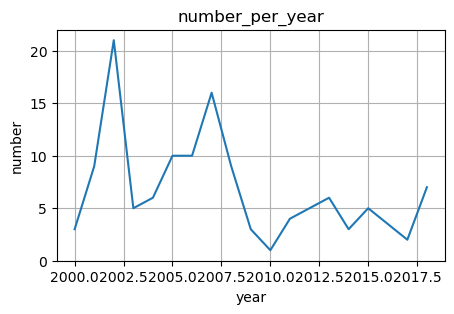

<Figure size 640x480 with 0 Axes>

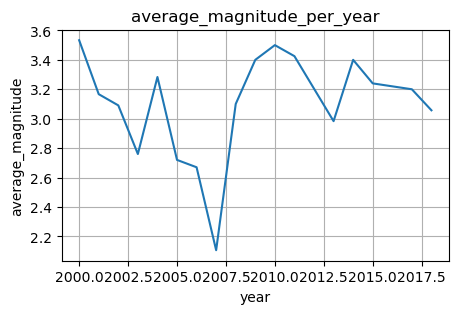

In [15]:
from datetime import date
import json
import matplotlib.pyplot as plt
import numpy as np

def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )


    # The response we get back is an object with several fields.
    # The actual contents we care about are in its text field:
    text = response.text
    # To understand the structure of this text, you may want to save it
    # to a file and open it in VS Code or a browser.
    # See the README file for more information.

    # We need to interpret the text to get values that we can work with.
    # What format is the text in? How can we load the values?
    return json.loads(text)


def get_year(earthquake):
    """Extract the year in which an earthquake happened."""
    timestamp = earthquake['properties']['time']
    # The time is given in a strange-looking but commonly-used format.
    # To understand it, we can look at the documentation of the source data:
    # https://earthquake.usgs.gov/data/comcat/index.php#time
    # Fortunately, Python provides a way of interpreting this timestamp:
    # (Question for discussion: Why do we divide by 1000?)
    year = date.fromtimestamp(timestamp/1000).year
    return year


def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    return earthquake["properties"]["mag"]


# This is function you may want to create to break down the computations,
# although it is not necessary. You may also change it to something different.
def get_magnitudes_per_year(earthquakes):
    """Retrieve the magnitudes of all the earthquakes in a given year.
    
    Returns a dictionary with years as keys, and lists of magnitudes as values.
    """
    ...
    magnitudes_per_year = {}
    for earthquake in earthquakes:
    
            year = get_year(earthquake)
            magnitude = get_magnitude(earthquake)

            
            if year not in magnitudes_per_year:
                magnitudes_per_year[year] = []

    
            magnitudes_per_year[year].append(magnitude)

    return magnitudes_per_year


def plot_average_magnitude_per_year(earthquakes):
    ...
    magnitudes_per_year = get_magnitudes_per_year(earthquakes)
    years = []
    average_magnitudes = []
    for year in magnitudes_per_year.keys():
        years.append(year)
        average_magnitude = np.mean(magnitudes_per_year[year])
        average_magnitudes.append(average_magnitude)

    plt.figure(figsize=(5, 3))
    plt.plot(years, average_magnitudes)
    plt.ylabel('average_magnitude')
    plt.xlabel('year')
    plt.title('average_magnitude_per_year')
    plt.grid()
    plt.show()


def plot_number_per_year(earthquakes):
    ...

    magnitudes_per_year = get_magnitudes_per_year(earthquakes)
    years = []
    nums = []
    for year in magnitudes_per_year.keys():
        years.append(year)
        nums.append(len(magnitudes_per_year[year]))
        

    plt.figure(figsize=(5, 3))
    plt.plot(years, nums)
    plt.ylabel('number')
    plt.xlabel('year')
    plt.title('number_per_year')
    plt.grid()
    plt.show()

# Get the data we will work with
quakes = get_data()['features']

# Plot the results - this is not perfect since the x axis is shown as real
# numbers rather than integers, which is what we would prefer!
plot_number_per_year(quakes)
plt.clf()  # This clears the figure, so that we don't overlay the two plots
plot_average_magnitude_per_year(quakes)